In [ ]:
# Biblioteca da RNA - Rede Neural Artificial
import tensorflow as tf
from tensorflow import keras

# Bibliotecas p/ o Processamento de Imagens
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

### **AQUISIÇÃO DAS IMAGENS**

In [ ]:
(treinamento_images, treinamento_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:

model = keras.Sequential(
    [
     # FLATTEN transforma a imagem de duas dimensões para apenas 1 dimensão.
     tf.keras.layers.Flatten(input_shape=(28, 28)),
     # DENSE podemos fazer a densidade na camada. SELU obtém um aprendizado exponencial.
     tf.keras.layers.Dense(128, activation=tf.nn.selu),
     # RELU mantém um aprendizado Linear não exponencial.
     tf.keras.layers.Dense(60, activation=tf.nn.relu),
     # SOFTMAX converte o vetor real em um vetor de probabilidades.
     tf.keras.layers.Dense(34, activation=tf.nn.softmax)
    ]
)

historico = model.compile(
    # ADAM se baseia no método da descida de gradiente estocástico, ele se adapta cada vez mais rápido.
    optimizer=tf.optimizers.Adam(),
    # SparseC.C calcula a perda da entropia cruzada entre os TRAIN_LABELS
    loss=tf.losses.SparseCategoricalCrossentropy(),
    # ACCURACY (acuracia) cálcula a frequência que as previsões são iguais aos TRAIN_LABELS
    metrics=['accuracy']
)


In [ ]:
name_clothes = ['Camisetas', 'Calça', 'Suéter', 'Vestidos', 'Casacos', 'Sandálias', 'Camisas', 'Tênis', 'Bolsa', 'Botas']

In [ ]:
model.fit(treinamento_images, treinamento_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5287 - accuracy: 0.6693
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6050 - accuracy: 0.7768
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5321 - accuracy: 0.8070
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4910 - accuracy: 0.8248
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4653 - accuracy: 0.8331


### **ANÁLISE DE IMAGENS**

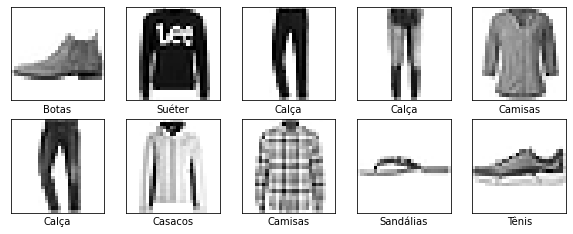

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(10):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(name_clothes[test_labels[i]])
plt.show()


### **RECONHECIMENTO DE PADRÕES**

313/313 - 0s - loss: 0.5055 - accuracy: 0.8267


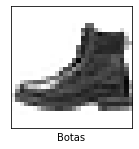

In [ ]:
# EVALUATE RETORNA OS VALORES DE PERDA E DA MÉTRICA
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

predictions = model.predict(test_images)
np.argmax(predictions[1875])
test_labels[1875]

plt.figure(figsize=(10,8))
plt.subplot(241), plt.imshow(test_images[39], cmap=plt.cm.binary)
plt.xlabel(name_clothes[test_labels[39]])
plt.xticks([])
plt.yticks([])
plt.show()

### **PROCESSAMENTO DAS IMAGENS E PÓS-PROCESSAMENTO P/ RECONHECIMENTO DE PADRÕES**

Total de objetos: 6


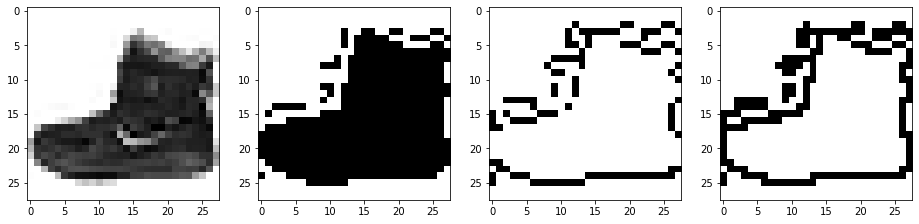

Total de objetos: 8


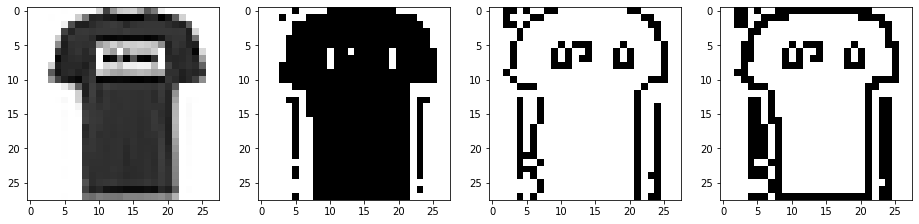

Total de objetos: 1


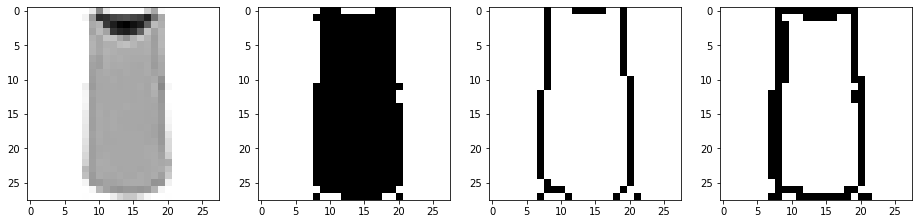

Total de objetos: 7


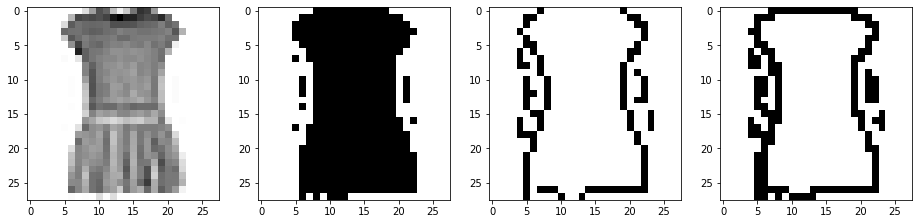

Total de objetos: 1


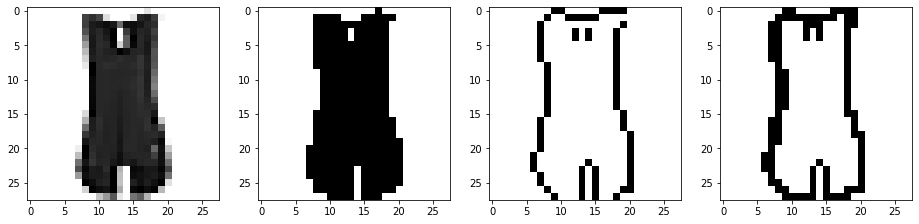

Total de objetos: 3


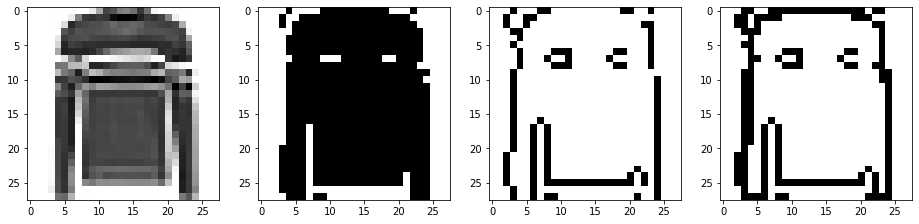

Total de objetos: 9


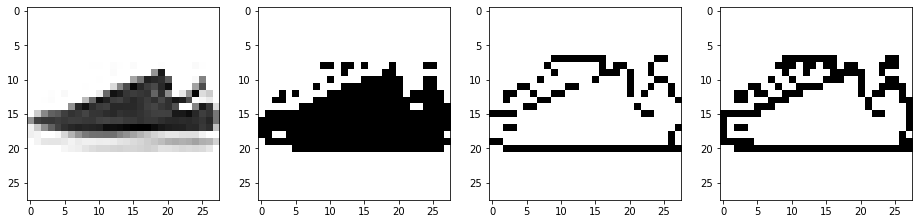

Total de objetos: 8


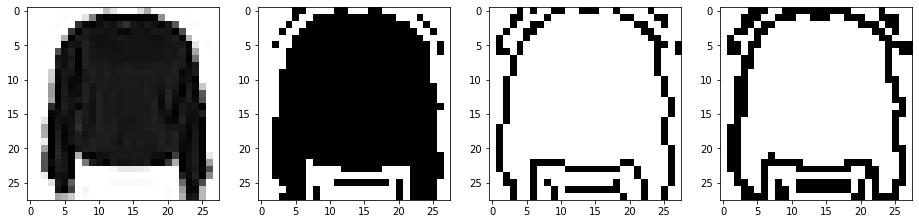

Total de objetos: 14


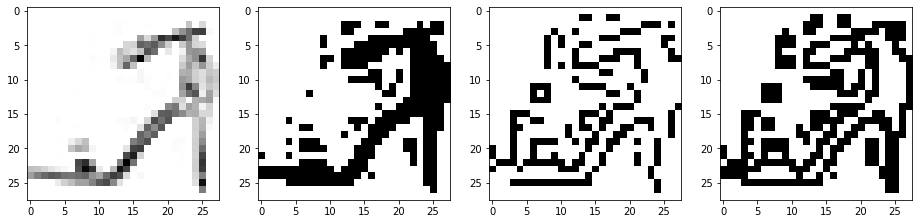

Total de objetos: 12


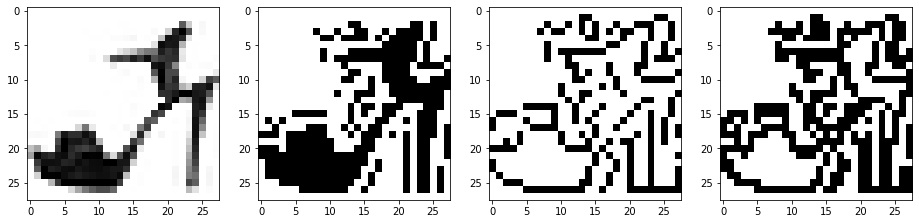

In [ ]:
for i in range(10):
  imgGray = treinamento_images[i]

  hist_gray = cv.calcHist([imgGray], [0], None, [256], [0, 256])

  imgBinary = imgGray.copy()
  
  imgFiltro= np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
  imgFiltrada = cv.filter2D(imgBinary,-1,imgFiltro)
  
  th, imgFiltrada =  cv.threshold(imgBinary, 0,255, cv.THRESH_BINARY)
  
  imgBinary2 = cv.Canny(imgFiltrada , 70, 150)
  contornos, ordem = cv.findContours(imgFiltrada, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  print("Total de objetos: {0}".format(len(contornos)))
  
  imgContorno = imgBinary2.copy()
  imgContorno = cv.drawContours(imgContorno, contornos, -1, (255,255,0), 1)
    
  plt.figure(figsize=(20,18))
  plt.subplot(252), plt.imshow(imgBinary,cmap='binary')
  plt.subplot(253), plt.imshow(imgFiltrada,cmap='binary')
  plt.subplot(254), plt.imshow(imgBinary2,cmap='binary')
  plt.subplot(255), plt.imshow(imgContorno, cmap='binary')
  plt.show()

**PROCESSAMENTO DAS IMAGENS DE TREINAMENTO**

In [ ]:
#Processamento das imagens de Treinamento
for i in range(len(treinamento_images)):
  #Importando as imagens de treinamento para a vareavel
  imgGrayTreinamento = treinamento_images[i]
  
  imgBinaryTreinamento = imgGrayTreinamento.copy()
  #Utilizando um filtro de Passa Alta para deixar os detalhes das imagens mais visivel
  imgFiltroTreinamento = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
  imgFiltradaTreinamento = cv.filter2D(imgBinaryTreinamento,-1, imgFiltroTreinamento)

  #Usando o Canny para reconhecer o contorno da imagem
  imgBinary2Treinamento = cv.Canny(imgFiltradaTreinamento , 70, 150)
  contornosTreinamento, ordem = cv.findContours(imgFiltradaTreinamento, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  print("Total de objetos: {0}".format(len(imgFiltradaTreinamento)))

  imgContornoTreinamento = imgBinary2Treinamento.copy()
  imgContornoTreinamento = cv.drawContours(imgContornoTreinamento, contornosTreinamento, -1, (255,255,0), 1)
    
  listaTreinamento = []
  listaTreinamento.append(imgContornoTreinamento)

  plt.figure(figsize=(20,18))
  plt.subplot(252), plt.imshow(imgBinaryTreinamento,cmap='binary')
  plt.subplot(253), plt.imshow(imgFiltradaTreinamento,cmap='binary')
  plt.subplot(254), plt.imshow(imgBinary2Treinamento,cmap='binary')
  plt.show()

In [ ]:
model.fit(listaTreinamento, treinamento_labels, epochs=5)

**PROCESSAMENTO DAS IMAGENS DE TESTE**

In [ ]:
#Processamento das imagens de Teste
for i in range(len(test_images)):
  #Importando as imagens de treinamento para a vareavel
  imgGrayTest = test_images[i]  
  
  imgBinaryTest = imgGrayTest.copy()
  #Utilizando um filtro de Passa Alta para deixar os detalhes das imagens mais visivel
  imgFiltroTest = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
  imgFiltradaTest = cv.filter2D(imgBinaryTest,-1, imgFiltro)
  
  #Usando o Canny para reconhecer o contorno da imagem
  imgBinary2Test = cv.Canny(imgFiltradaTest , 70, 150)
  contornosTest, ordem = cv.findContours(imgFiltradaTest, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  print("Total de objetos: {0}".format(len(contornosTest)))

  imgContornoTeste = imgBinary2Test.copy()
  imgContornoTeste = cv.drawContours(imgContornoTeste, contornosTest, -1, (255,255,0), 1)

  listaTest = []
  listaTest.append(imgContornoTeste)
  
  plt.figure(figsize=(20,18))
  plt.subplot(251), plt.imshow(imgContornoTeste,cmap='binary')
  plt.subplot(252), plt.imshow(imgBinaryTest,cmap='binary')
  plt.subplot(253), plt.imshow(imgFiltradaTest,cmap='binary')
  plt.subplot(254), plt.imshow(imgBinary2Test,cmap='binary')
  plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(listaTest, test_labels, verbose=2)

predictions = model.predict(test_acc)
np.argmax(predictions[])
test_labels[]